# Natural Language Processing with NLTK, SpaCy, Word2Vec, and TF-IDF

## Objective: In this assignment, you will learn how to perform Natural Language Processing tasks using Python libraries such as NLTK, SpaCy, Word2Vec, and TF-IDF. You will practice techniques such as tokenization, stemming, lemmatization, and document similarity calculation using these libraries. You will use the BBC News dataset available on Kaggle.

## Tasks:

### 1. Import the necessary libraries: Start by importing the required libraries, including NLTK, SpaCy, gensim, and scikit-learn.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import nltk
import gensim
import sklearn

### 2. Load the dataset: Load the BBC News dataset(BBC_DATA.csv) into a pandas DataFrame using the read_csv() function. The dataset contains 1,490 rows and 3 columns, with the first column containing the text of the news articles.

In [47]:
data = pd.read_csv("BBC_DATA.csv")

In [48]:
data.shape

(1490, 3)

In [49]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [51]:
data.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [52]:
data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

<Axes: >

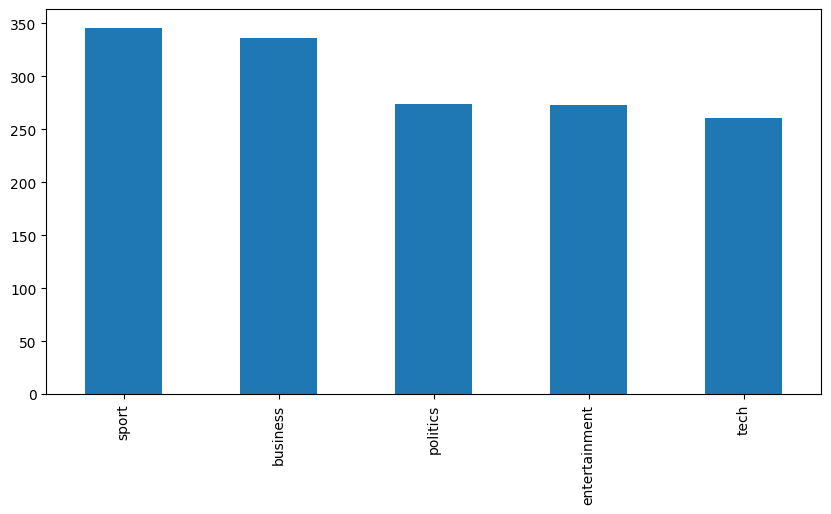

In [53]:
data['Category'].value_counts().plot(kind="bar", figsize=(10,5))

### 3. Tokenization with NLTK: Implement tokenization using NLTK's word_tokenize() and sent_tokenize() functions. Apply these functions to a sample news article from the dataset.

In [54]:
from nltk import word_tokenize, sent_tokenize

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
sample_data = data["Text"].iloc[:10]

In [57]:
# Word Tokenizer

for text in sample_data:
  word = word_tokenize(text)
  print(word)
  print("Number of tokens in a sentence:",len(word))

['worldcom', 'ex-boss', 'launches', 'defence', 'lawyers', 'defending', 'former', 'worldcom', 'chief', 'bernie', 'ebbers', 'against', 'a', 'battery', 'of', 'fraud', 'charges', 'have', 'called', 'a', 'company', 'whistleblower', 'as', 'their', 'first', 'witness', '.', 'cynthia', 'cooper', 'worldcom', 's', 'ex-head', 'of', 'internal', 'accounting', 'alerted', 'directors', 'to', 'irregular', 'accounting', 'practices', 'at', 'the', 'us', 'telecoms', 'giant', 'in', '2002.', 'her', 'warnings', 'led', 'to', 'the', 'collapse', 'of', 'the', 'firm', 'following', 'the', 'discovery', 'of', 'an', '$', '11bn', '(', '£5.7bn', ')', 'accounting', 'fraud', '.', 'mr', 'ebbers', 'has', 'pleaded', 'not', 'guilty', 'to', 'charges', 'of', 'fraud', 'and', 'conspiracy', '.', 'prosecution', 'lawyers', 'have', 'argued', 'that', 'mr', 'ebbers', 'orchestrated', 'a', 'series', 'of', 'accounting', 'tricks', 'at', 'worldcom', 'ordering', 'employees', 'to', 'hide', 'expenses', 'and', 'inflate', 'revenues', 'to', 'meet',

In [58]:
# Sentence Tokenizer

for text in sample_data:
  sent = sent_tokenize(text)
  print(sent)
  print("Number of sentence tokens:",len(sent))

['worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.', 'cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud.', 'mr ebbers has pleaded not guilty to charges of fraud and conspiracy.', 'prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates.', 'but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by world

### 4. Stemming and Lemmatization with NLTK: Implement stemming and lemmatization using NLTK's PorterStemmer and WordNetLemmatizer functions. Apply these functions to a sample news article from the dataset.

In [59]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [60]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
sample_article_index = 0
sample_article_text = data['Text'][sample_article_index]

tokens = word_tokenize(sample_article_text)

porter_stemmer = PorterStemmer()
stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]

wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]

print(f"Original Article:\n{sample_article_text}\n")
print(f"Stemmed Tokens:\n{stemmed_tokens}\n")
print(f"Lemmatized Tokens:\n{lemmatized_tokens}")

Original Article:
worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by

### 5. Named Entity Recognition with SpaCy: Use SpaCy's pre-trained model to perform named entity recognition on a sample news article from the dataset. Visualize the named entities using displaCy.

In [62]:
import spacy

In [63]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [64]:
nlp = spacy.load("en_core_web_sm")

In [65]:
for text in sample_data:
  sent = sent_tokenize(text)
  print(sent)
  doc = nlp(sent[0]) # taking first sentence from every each text
  for ent in doc.ents:
    print(f"{ent} --> {ent.label_}")
  print("\n")

['worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.', 'cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud.', 'mr ebbers has pleaded not guilty to charges of fraud and conspiracy.', 'prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates.', 'but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by world

### 6. Word2Vec with gensim: Implement Word2Vec using gensim's Word2Vec function on the entire dataset. Train the model and get the vector representation of a sample word.

In [66]:
from gensim.models import Word2Vec

for text in sample_data:
  text1_sent = sent_tokenize(text)
  print(text1_sent)
  print("Number of sentence tokens:",len(text1_sent))
  break

tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in text1_sent]
print(tokenized_sentences)

model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

sample_word_vector = model.wv['worldcom']
print(f"Vector representation of 'worldcom':\n{sample_word_vector}")

word_to_check = 'chief'

if word_to_check in model.wv.index_to_key:
    vector_representation = model.wv[word_to_check]
    print(f"Vector representation of '{word_to_check}':\n{vector_representation}")

['worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.', 'cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud.', 'mr ebbers has pleaded not guilty to charges of fraud and conspiracy.', 'prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates.', 'but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by world

### 7. TF-IDF with scikit-learn: Implement TF-IDF using scikit-learn's TfidfVectorizer function on the entire dataset. Transform the dataset using the fitted vectorizer and calculate the cosine similarity between two news articles.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
# Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Text'])

In [69]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [70]:
tfidf_df

,00,000,0001,000bn,000m,000th,001,001and,001st,0051,...,zonealarm,zones,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.020274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.017389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0.0,0.030012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1486,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1487,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1488,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Calculate Cosine Similarity between the first two articles
article1_index = 0
article2_index = 1

cosine_sim = cosine_similarity(tfidf_matrix[article1_index], tfidf_matrix[article2_index])
print(f"Cosine Similarity between Article {data['ArticleId'][article1_index]} and Article {data['ArticleId'][article2_index]}: {cosine_sim[0][0]}")

Cosine Similarity between Article 1833 and Article 154: 0.07875931547482325


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Category'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train_tfidf, y_train)

    y_pred = svm_model.predict(X_test_tfidf)

    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Kernel: linear
Accuracy: 0.9765100671140939
Classification Report:
                precision    recall  f1-score   support

     business       0.97      0.99      0.98        75
entertainment       0.96      0.98      0.97        46
     politics       0.95      0.96      0.96        56
        sport       1.00      1.00      1.00        63
         tech       1.00      0.95      0.97        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298


Kernel: rbf
Accuracy: 0.9731543624161074
Classification Report:
                precision    recall  f1-score   support

     business       0.96      0.99      0.97        75
entertainment       0.96      0.98      0.97        46
     politics       0.95      0.95      0.95        56
        sport       1.00      1.00      1.00        63
         tech       1.00      0.95      0.97        58

     accuracy                      

In [73]:
# Assuming 'new_text' is the new text for which you want to predict the category
new_texts = [
    "The latest breakthroughs in artificial intelligence are reshaping the tech industry.",
    "The recent sports event showcased incredible performances from athletes around the world.",
    "The stock market experienced a significant boost after positive economic reports.",
    "A thrilling new movie has hit the theaters, capturing the attention of audiences.",
    "Government officials announced a new policy aimed at addressing climate change and promoting sustainability."
]

for text in new_texts:
    # Vectorize the new text using the same vectorizer
    new_text_tfidf = vectorizer.transform([text])

    # Make predictions using the trained SVM model
    predicted_category = svm_model.predict(new_text_tfidf)

    print(f"\nText: {text}")
    print("Predicted Category:", predicted_category[0])


Text: The latest breakthroughs in artificial intelligence are reshaping the tech industry.
Predicted Category: business

Text: The recent sports event showcased incredible performances from athletes around the world.
Predicted Category: sport

Text: The stock market experienced a significant boost after positive economic reports.
Predicted Category: business

Text: A thrilling new movie has hit the theaters, capturing the attention of audiences.
Predicted Category: entertainment

Text: Government officials announced a new policy aimed at addressing climate change and promoting sustainability.
Predicted Category: politics


### 8. Bonus: Choose a different dataset and perform NLP tasks using different techniques. Be creative!

In [74]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
from gensim.models import Word2Vec

# Sample dataset
data = {
    'Text': [
        "This is a positive sentence. I love NLP!",
        "Negative sentiment here. Not happy with the results.",
        "SpaCy is a great NLP library.",
        "NLTK provides powerful tools for NLP tasks.",
        "Word2Vec is a word embedding technique.",
        "TF-IDF is useful for text vectorization."
    ]
}

df = pd.DataFrame(data)

# NLTK Sentiment Analysis
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df['NLTK_Sentiment'] = df['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# SpaCy NLP
nlp = spacy.load('en_core_web_sm')
df['SpaCy_Token_Count'] = df['Text'].apply(lambda x: len(nlp(x)))
df['SpaCy_Pos_Tags'] = df['Text'].apply(lambda x: [token.pos_ for token in nlp(x)])

# Word2Vec
tokenized_sentences = [nltk.word_tokenize(sentence.lower()) for sentence in df['Text']]
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_word2vec_vector(sentence):
    tokens = nltk.word_tokenize(sentence.lower())
    vector_sum = sum(model.wv[token] for token in tokens if token in model.wv)
    return vector_sum / len(tokens) if len(tokens) > 0 else None

df['Word2Vec_Vector'] = df['Text'].apply(get_word2vec_vector)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])
df['TFIDF_Vector'] = list(tfidf_matrix.toarray())

# Display the DataFrame
print(df)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                Text  NLTK_Sentiment  \
0           This is a positive sentence. I love NLP!          0.8553   
1  Negative sentiment here. Not happy with the re...         -0.7716   
2                      SpaCy is a great NLP library.          0.6249   
3        NLTK provides powerful tools for NLP tasks.          0.4215   
4            Word2Vec is a word embedding technique.          0.0000   
5           TF-IDF is useful for text vectorization.          0.4404   

   SpaCy_Token_Count                                     SpaCy_Pos_Tags  \
0                 10  [PRON, AUX, DET, ADJ, NOUN, PUNCT, PRON, VERB,...   
1                 10  [ADJ, NOUN, ADV, PUNCT, PART, ADJ, ADP, DET, N...   
2                  7         [PROPN, AUX, DET, ADJ, PROPN, NOUN, PUNCT]   
3                  8  [PROPN, VERB, ADJ, NOUN, ADP, PROPN, NOUN, PUNCT]   
4                  7         [PROPN, AUX, DET, NOUN, VERB, NOUN, PUNCT]   
5                  9  [PROPN, PUNCT, PROPN, A